Assim como no outro notebook, elaboramos este pensando na entrega do nosso 3° status.

As informações contida nele, tem como finalidade estarem presente na nossa dashboard, para que sirva de valor para o nosso contratante na sua tomada de desição.

Através do levantamento da agência nacional de podcast, conseguimos uma base nacional sobre o assunto, onde através dela tínhamos o intuito a geração de insights do nicho para os nossos clientes.

Fizemos algumas analises simples de dados, onde o intuito era levar informações para quem estava visualizando.
Também foi usado de tecnicas de machine learning como os modelos K-means, modelo hierárquico e um ainda não visto em sala que é o de DBSCAN

## Imports iniciais e lendo a base de dados desejada

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#dataset = pd.read_excel('PodPesquisa-ouvintes-2019.xlsx')
dataset = pd.read_excel('PodPesquisa-ouvintes-2019.xlsx', 'Respostas')

## Visualizando informações importantes

In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Columns: 140 entries, Resposta to 28. Você ouve a sessão de recados e leitura de emails / feedback de ouvintes?Ajustado
dtypes: float64(3), int64(87), object(50)
memory usage: 17.9+ MB


In [3]:
dataset.head()

,Resposta,1. Qual a sua idade ?,2. Qual é o seu estado civil ?,3. Qual o seu nível de escolaridade?,4. Qual é seu gênero?,5. Qual sua raça / cor?,6. Qual sua orientação sexual,7. Qual é sua localidade atual ?,8. Em que Estado do Brasil você mora?,9. Em que país você vive?,...,25 - Comportamento Redes Sociais - 04 Procuro interagir com eles mas nunca fui notado,26. Propaganda Ajustada,27 - Ocasiões que ouve - 01 Quando estou navegando na internet,27 - Ocasiões que ouve - 02 Quando estou me locomovendo,27 - Ocasiões que ouve - 03 Quando estou trabalhando/estudando/lendo,27 - Ocasiões que ouve - 04 Durante a prática de atividades físicas,27 - Ocasiões que ouve - 05 Durante a realização de tarefas domésticas,27 - Ocasiões que ouve - 06 Antes de dormir,27 - Ocasiões que ouve - 07 Não divido com outras atividades,28. Você ouve a sessão de recados e leitura de emails / feedback de ouvintes?Ajustado
0,A00001,35.0,NaN,Superior completo,Masculino Cis,Branco,Heterossexual,Curitiba,Paraná (PR),Brasil,...,0,3 - O anúncio é do próprio podcast (loja própr...,1,1,1,1,1,1,0,"1 - Sim, Sempre"
1,A00002,30.0,Solteiro,Superior incompleto,Masculino Cis,Preto,Heterossexual,"Palhoça,SC,Brasil",Santa Catarina (SC),Brasil,...,0,1 - Tem a ver com o tema do episódio,0,1,1,0,1,1,0,"3 - Às vezes, depende da posição no episódio"
2,A00003,34.0,Casado / Amasiado,Nivel Médio,Masculino Cis,Pardo,Heterossexual,Porto Alegre Brasil,Rio Grande do Sul (RS),Brasil,...,0,5 - Não presto atenção aos anúncios e propagandas,0,0,0,0,0,1,0,"1 - Sim, Sempre"
3,A00004,25.0,Solteiro,Superior completo,Feminino Cis,Branco,Heterossexual,Rio de Janeiro,Rio de Janeiro (RJ),Brasil,...,0,2 - Anuncia um produto ou serviço muito bom,1,1,1,1,1,1,0,"3 - Às vezes, depende da posição no episódio"
4,A00005,30.0,Solteiro,Superior completo,Masculino Cis,Branco,Heterossexual,Vespasiano MG,Minas Gerais (MG),Brasil,...,0,2 - Anuncia um produto ou serviço muito bom,1,1,0,1,1,1,0,"3 - Às vezes, depende da posição no episódio"


In [4]:
dataset.describe()

,1. Qual a sua idade ?,13. Aproximadamente quantos podcasts você ouve ?,23. Até quanto você pagaria (mensalmente em R$) para consumir conteúdos exclusivos do seu podcast favorito?,16 - Aspectos Importantes - 01 Entretenimento,16 - Aspectos Importantes - 02 Qualidade do áudio,16 - Aspectos Importantes - 03 Conteúdo,16 - Aspectos Importantes - 04 Frequência de publicação,16 - Aspectos Importantes - 05 Facilidade de acesso,16 - Aspectos Importantes - 06 Locução,16 - Aspectos Importantes - 07 Músicas,...,25 - Comportamento Redes Sociais - 02 Posso deixar de seguir ou deixar de ouvir podcasts dependendo das suas opiniões ou orientação política,25 - Comportamento Redes Sociais - 03 Procuro interagir e eles reagem ou me seguem também,25 - Comportamento Redes Sociais - 04 Procuro interagir com eles mas nunca fui notado,27 - Ocasiões que ouve - 01 Quando estou navegando na internet,27 - Ocasiões que ouve - 02 Quando estou me locomovendo,27 - Ocasiões que ouve - 03 Quando estou trabalhando/estudando/lendo,27 - Ocasiões que ouve - 04 Durante a prática de atividades físicas,27 - Ocasiões que ouve - 05 Durante a realização de tarefas domésticas,27 - Ocasiões que ouve - 06 Antes de dormir,27 - Ocasiões que ouve - 07 Não divido com outras atividades
count,16709.000000,16593.000000,15250.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,...,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000
mean,28.517924,16.496776,16.823340,0.749058,0.710644,0.917848,0.387064,0.334889,0.165081,0.058816,...,0.358763,0.266499,0.143421,0.351583,0.786753,0.437982,0.445641,0.724885,0.283612,0.020583
std,8.154665,776.356735,131.222926,0.433568,0.453477,0.274604,0.487093,0.471966,0.371265,0.235288,...,0.479652,0.442141,0.350512,0.477479,0.409613,0.496154,0.497051,0.446586,0.450764,0.141987
min,10.000000,0.000000,-1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,4.000000,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,7.000000,10.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,33.000000,12.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,222.000000,100000.000000,10000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Excluindo algumas colunas que acho que não vão ser utilizadas

In [5]:
dataset = dataset.drop(columns=["Resposta", "7. Qual é sua localidade atual ?", "11. Aproximadamente, qual é a sua renda familiar mensal (em R$)?", "2. Qual é o seu estado civil ?", "3. Qual o seu nível de escolaridade?"])
dataset.head()

,1. Qual a sua idade ?,4. Qual é seu gênero?,5. Qual sua raça / cor?,6. Qual sua orientação sexual,8. Em que Estado do Brasil você mora?,9. Em que país você vive?,10. Qual das opções abaixo melhor descreve a sua situação empregatícia?,12. Há quantos anos você ouve podcast?,13. Aproximadamente quantos podcasts você ouve ?,14. O que levou você a ouvir podcast?,...,25 - Comportamento Redes Sociais - 04 Procuro interagir com eles mas nunca fui notado,26. Propaganda Ajustada,27 - Ocasiões que ouve - 01 Quando estou navegando na internet,27 - Ocasiões que ouve - 02 Quando estou me locomovendo,27 - Ocasiões que ouve - 03 Quando estou trabalhando/estudando/lendo,27 - Ocasiões que ouve - 04 Durante a prática de atividades físicas,27 - Ocasiões que ouve - 05 Durante a realização de tarefas domésticas,27 - Ocasiões que ouve - 06 Antes de dormir,27 - Ocasiões que ouve - 07 Não divido com outras atividades,28. Você ouve a sessão de recados e leitura de emails / feedback de ouvintes?Ajustado
0,35.0,Masculino Cis,Branco,Heterossexual,Paraná (PR),Brasil,Autônomo / Profissional liberal,6,12.0,Qualidade e diversidade do conteúdo,...,0,3 - O anúncio é do próprio podcast (loja própr...,1,1,1,1,1,1,0,"1 - Sim, Sempre"
1,30.0,Masculino Cis,Preto,Heterossexual,Santa Catarina (SC),Brasil,Não empregado,4,10.0,"Liberdade para ouvir quando, como e onde eu qu...",...,0,1 - Tem a ver com o tema do episódio,0,1,1,0,1,1,0,"3 - Às vezes, depende da posição no episódio"
2,34.0,Masculino Cis,Pardo,Heterossexual,Rio Grande do Sul (RS),Brasil,Empregador / Empresário,3,10.0,"Liberdade para ouvir quando, como e onde eu qu...",...,0,5 - Não presto atenção aos anúncios e propagandas,0,0,0,0,0,1,0,"1 - Sim, Sempre"
3,25.0,Feminino Cis,Branco,Heterossexual,Rio de Janeiro (RJ),Brasil,Autônomo / Profissional liberal,3,20.0,Qualidade e diversidade do conteúdo,...,0,2 - Anuncia um produto ou serviço muito bom,1,1,1,1,1,1,0,"3 - Às vezes, depende da posição no episódio"
4,30.0,Masculino Cis,Branco,Heterossexual,Minas Gerais (MG),Brasil,Não empregado,8,25.0,"Liberdade para ouvir quando, como e onde eu qu...",...,0,2 - Anuncia um produto ou serviço muito bom,1,1,0,1,1,1,0,"3 - Às vezes, depende da posição no episódio"


## Vendo quais colunas possuem valores nulos

In [6]:
dataset.isnull().sum()

1. Qual a sua idade ?                                                                     4
4. Qual é seu gênero?                                                                    49
5. Qual sua raça / cor?                                                                  56
6. Qual sua orientação sexual                                                            37
8. Em que Estado do Brasil você mora?                                                     4
                                                                                         ..
27 - Ocasiões que ouve - 04 Durante a prática de atividades físicas                       0
27 - Ocasiões que ouve - 05 Durante a realização de tarefas domésticas                    0
27 - Ocasiões que ouve - 06 Antes de dormir                                               0
27 - Ocasiões que ouve - 07 Não divido com outras atividades                              0
28. Você ouve a sessão de recados e leitura de emails / feedback de ouvintes?Aju

## A coluna idade para nós é muito importante, sendo assim desejamos completar os valores nulos dela com a média da idade da coluna.

In [7]:
mediana = dataset['1. Qual a sua idade ?'].median()
print(mediana)

27.0


In [8]:
dataset.update(dataset['1. Qual a sua idade ?'].fillna(mediana))
dataset.loc[dataset['1. Qual a sua idade ?']==27].head()

,1. Qual a sua idade ?,4. Qual é seu gênero?,5. Qual sua raça / cor?,6. Qual sua orientação sexual,8. Em que Estado do Brasil você mora?,9. Em que país você vive?,10. Qual das opções abaixo melhor descreve a sua situação empregatícia?,12. Há quantos anos você ouve podcast?,13. Aproximadamente quantos podcasts você ouve ?,14. O que levou você a ouvir podcast?,...,25 - Comportamento Redes Sociais - 04 Procuro interagir com eles mas nunca fui notado,26. Propaganda Ajustada,27 - Ocasiões que ouve - 01 Quando estou navegando na internet,27 - Ocasiões que ouve - 02 Quando estou me locomovendo,27 - Ocasiões que ouve - 03 Quando estou trabalhando/estudando/lendo,27 - Ocasiões que ouve - 04 Durante a prática de atividades físicas,27 - Ocasiões que ouve - 05 Durante a realização de tarefas domésticas,27 - Ocasiões que ouve - 06 Antes de dormir,27 - Ocasiões que ouve - 07 Não divido com outras atividades,28. Você ouve a sessão de recados e leitura de emails / feedback de ouvintes?Ajustado
7,27.0,Feminino Cis,Branco,Assexual,São Paulo (SP),Brasil,Autônomo / Profissional liberal,5,4.0,"Liberdade para ouvir quando, como e onde eu qu...",...,0,1 - Tem a ver com o tema do episódio,1,0,1,0,1,1,0,"3 - Às vezes, depende da posição no episódio"
13,27.0,Feminino Cis,Branco,Heterossexual,São Paulo (SP),Brasil,Empregador / Empresário,3,30.0,"Liberdade para ouvir quando, como e onde eu qu...",...,0,4 - Oferece algum desconto para os ouvintes,0,1,0,0,1,0,0,"2 - Não, nunca"
32,27.0,Feminino Cis,Pardo,Heterossexual,São Paulo (SP),Brasil,Empregado assalariado com ou sem carteira assi...,Até 1,5.0,"Liberdade para ouvir quando, como e onde eu qu...",...,0,5 - Não presto atenção aos anúncios e propagandas,0,1,1,1,0,0,0,4 - Outros
38,27.0,Masculino Cis,Branco,Heterossexual,Minas Gerais (MG),Brasil,Empregado assalariado com ou sem carteira assi...,Mais de 10,20.0,Qualidade e diversidade do conteúdo,...,1,1 - Tem a ver com o tema do episódio,1,1,0,0,1,1,0,"2 - Não, nunca"
62,27.0,Masculino Cis,Branco,Heterossexual,Rio de Janeiro (RJ),Brasil,Pesquisador,7,3.0,Qualidade e diversidade do conteúdo,...,0,1 - Tem a ver com o tema do episódio,0,0,1,1,1,0,0,"1 - Sim, Sempre"


In [9]:
dataset.isnull().sum()

1. Qual a sua idade ?                                                                     0
4. Qual é seu gênero?                                                                    49
5. Qual sua raça / cor?                                                                  56
6. Qual sua orientação sexual                                                            37
8. Em que Estado do Brasil você mora?                                                     4
                                                                                         ..
27 - Ocasiões que ouve - 04 Durante a prática de atividades físicas                       0
27 - Ocasiões que ouve - 05 Durante a realização de tarefas domésticas                    0
27 - Ocasiões que ouve - 06 Antes de dormir                                               0
27 - Ocasiões que ouve - 07 Não divido com outras atividades                              0
28. Você ouve a sessão de recados e leitura de emails / feedback de ouvintes?Aju

## Apagando linhas com valores nulos

In [10]:
dataset = dataset.dropna(subset=['4. Qual é seu gênero?'])

In [11]:
dataset = dataset.dropna(subset=['6. Qual sua orientação sexual'])

In [12]:
dataset.isnull().sum()

1. Qual a sua idade ?                                                                     0
4. Qual é seu gênero?                                                                     0
5. Qual sua raça / cor?                                                                  36
6. Qual sua orientação sexual                                                             0
8. Em que Estado do Brasil você mora?                                                     0
                                                                                         ..
27 - Ocasiões que ouve - 04 Durante a prática de atividades físicas                       0
27 - Ocasiões que ouve - 05 Durante a realização de tarefas domésticas                    0
27 - Ocasiões que ouve - 06 Antes de dormir                                               0
27 - Ocasiões que ouve - 07 Não divido com outras atividades                              0
28. Você ouve a sessão de recados e leitura de emails / feedback de ouvintes?Aju

## Nessa visualização desejamos ter uma noção de qual era a faixa etária que mais consumia podcast

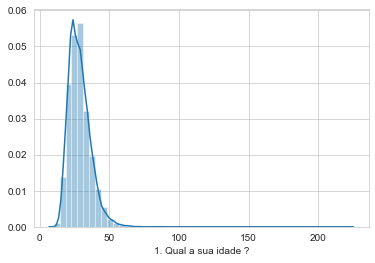

In [13]:
data = [1.5]*7 + [2.5]*2 + [3.5]*8 + [4.5]*3 + [5.5]*1 + [6.5]*8
sns.set_style('whitegrid')
sns.distplot(dataset['1. Qual a sua idade ?'].dropna())

## Para o nosso projeto, esse tipo de insight é muito importante, tendo em vista que temos como tema o "entretenimento", e a partir deste gráfico podemos ver que as pessoas consomem mais podcast com esse intuito.

C:\Users\Jean\anaconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


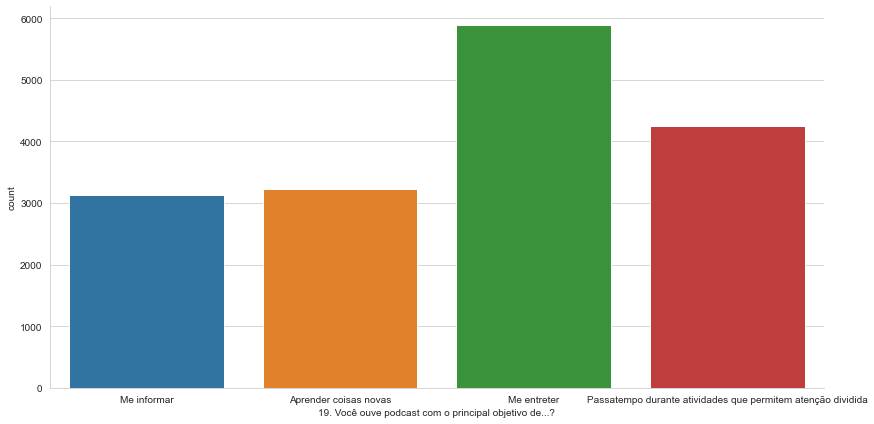

In [14]:
sns.catplot('19. Você ouve podcast com o principal objetivo de...?', data=dataset, kind='count',size=6, aspect=2)

## Aqui conseguimos visualizar qual o objetivo de se assistir podcast para as médias de idades

### Podemos notar que para pessoas mais velhas, o principal intuito é de se informar, e ja para as pessoas mais novas,  elas buscam mais se entreter

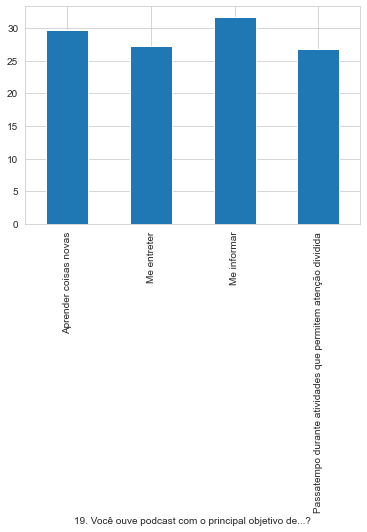

In [15]:
result = dataset.groupby('19. Você ouve podcast com o principal objetivo de...?')['1. Qual a sua idade ?'].agg('mean')
result.plot(kind='bar')

## Plataformas que são mais consumidas

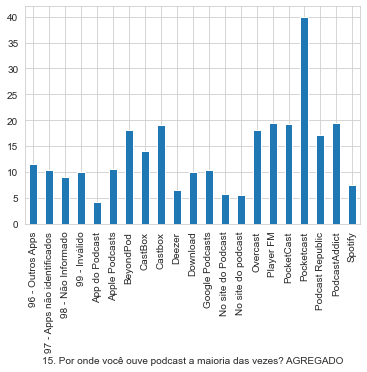

In [16]:
result = dataset.groupby('15. Por onde você ouve podcast a maioria das vezes? AGREGADO')['13. Aproximadamente quantos podcasts você ouve ?'].agg('mean')
result.plot(kind='bar')

## Queriamos ver se teria algum nível de desigualdade, e a visualização acabou supreendendo, tendo como a raça preta uma alta consumista de podcast.

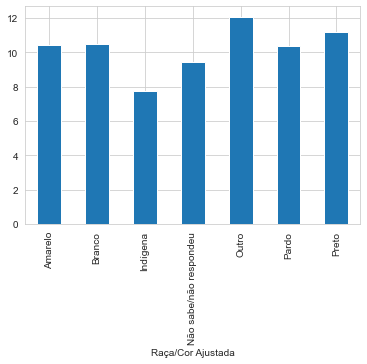

In [17]:
result = dataset.groupby('Raça/Cor Ajustada')['13. Aproximadamente quantos podcasts você ouve ?'].agg('mean')
result.plot(kind='bar')

## Gostariamos de ver qual nível de escolaridade consome mais podcast

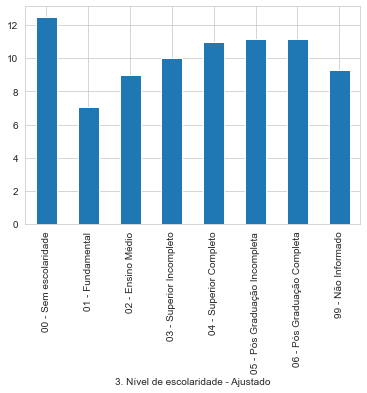

In [18]:
result = dataset.groupby('3. Nível de escolaridade - Ajustado')['13. Aproximadamente quantos podcasts você ouve ?'].agg('mean')
result.plot(kind='bar')

## Quais regiões que mais consomem

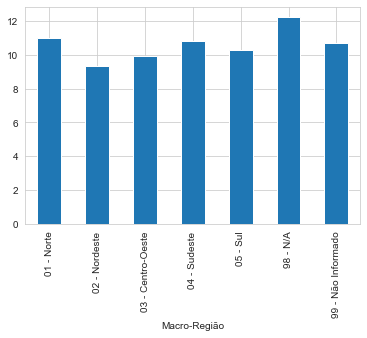

In [19]:
result = dataset.groupby('Macro-Região')['13. Aproximadamente quantos podcasts você ouve ?'].agg('mean')
result.plot(kind='bar')

## Estados que mais consomes

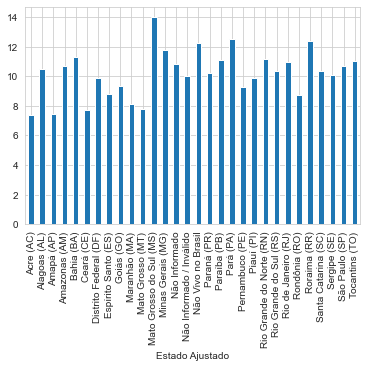

In [20]:
result = dataset.groupby('Estado Ajustado')['13. Aproximadamente quantos podcasts você ouve ?'].agg('mean')
result.plot(kind='bar')

## Gêneros que mais consomem

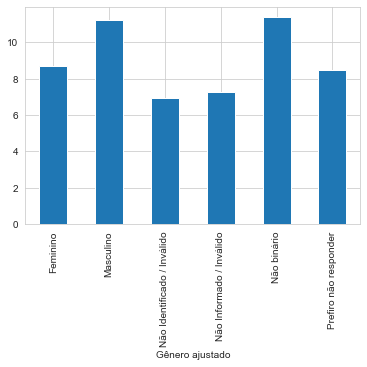

In [21]:
result = dataset.groupby('Gênero ajustado')['13. Aproximadamente quantos podcasts você ouve ?'].agg('mean')
result.plot(kind='bar')

## Insigth importantíssimo para ver se as pessoas respondem pesquisas / dão feedbacks por e-mail

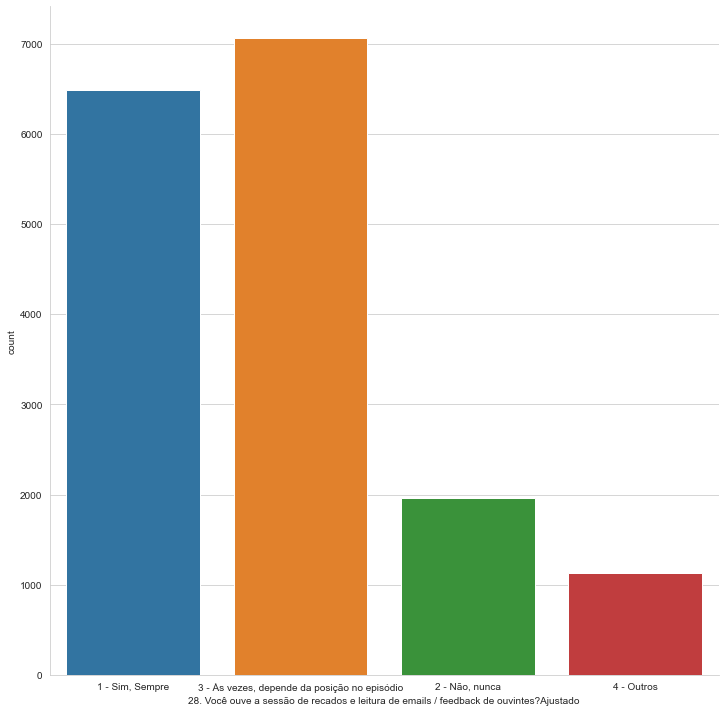

In [22]:
sns.catplot('28. Você ouve a sessão de recados e leitura de emails / feedback de ouvintes?Ajustado', data=dataset, kind='count',size=10, aspect=1)

## Aqui conseguimos perceber que a grande massa de podcast está se formando de alguns anos para cá, isso bate com a nossa pesquisa, que mostra que o ouvinte de podcast vem aumentando bastante nos ultimos anos.

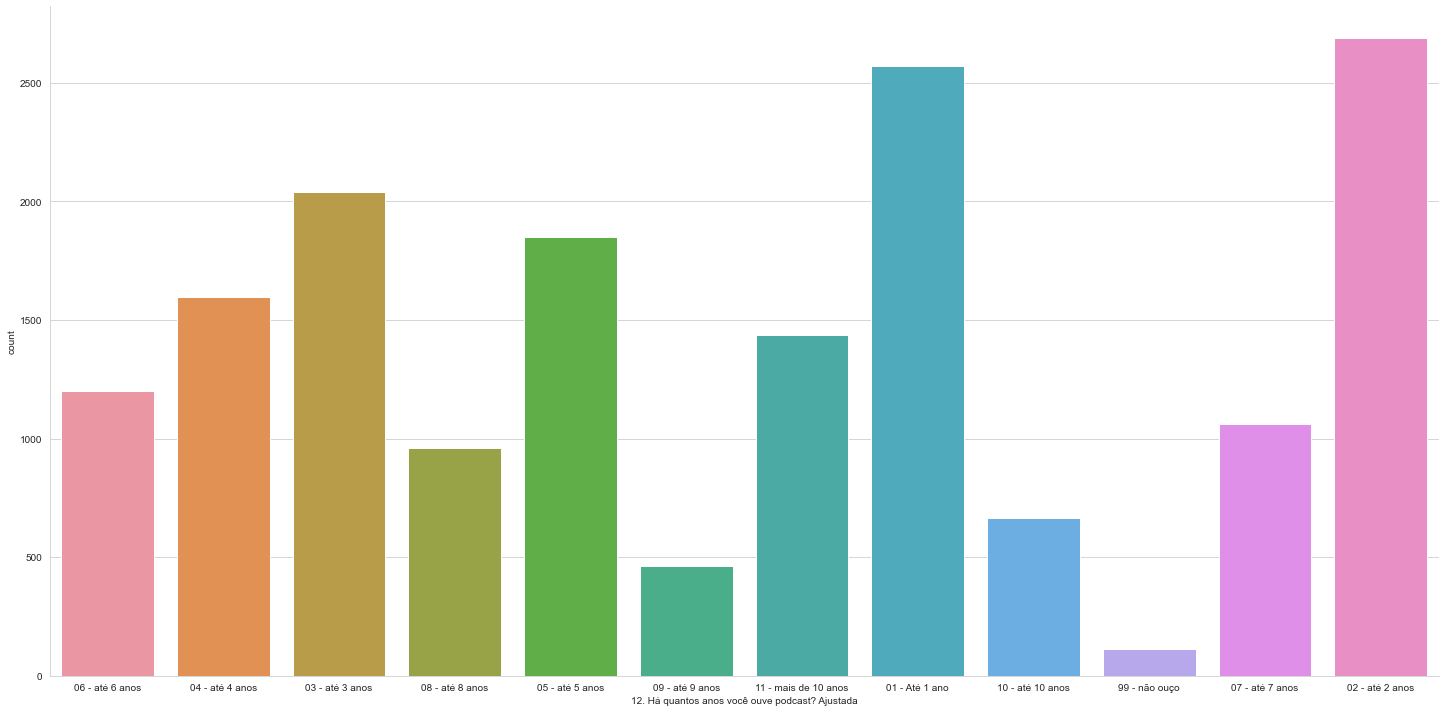

In [23]:
sns.catplot('12. Há quantos anos você ouve podcast? Ajustada', data=dataset, kind='count',size=10, aspect=2)

## Plotando a dispersão de idade vs Até quanto você pagaria para consumir os conteúdos do podcast

In [24]:
%matplotlib inline
from matplotlib import pyplot as plt

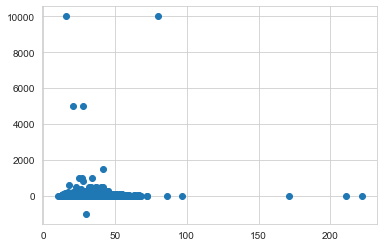

In [25]:
plt.scatter(dataset['1. Qual a sua idade ?'],dataset['23. Até quanto você pagaria (mensalmente em R$) para consumir conteúdos exclusivos do seu podcast favorito?'])
plt.show()

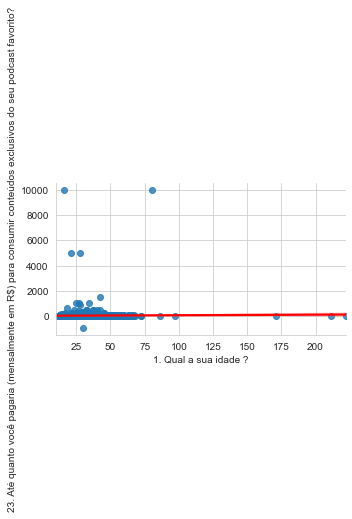

In [26]:
sns.lmplot(data=dataset, x='1. Qual a sua idade ?', y='23. Até quanto você pagaria (mensalmente em R$) para consumir conteúdos exclusivos do seu podcast favorito?', line_kws={'color': 'red'})

## Normalizando os dados

Separando as colunas que irei utilizar em um dataset dataframe diferente

In [27]:
dataset_new = dataset[['1. Qual a sua idade ?','23. Até quanto você pagaria (mensalmente em R$) para consumir conteúdos exclusivos do seu podcast favorito?']].copy()

In [28]:
dataset_new.head()

,1. Qual a sua idade ?,23. Até quanto você pagaria (mensalmente em R$) para consumir conteúdos exclusivos do seu podcast favorito?
0,35.0,50.0
1,30.0,20.0
2,34.0,10.0
3,25.0,10.0
4,30.0,0.0


### Para normalizar os dados utilzei a função do python StandardScaler.

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dfs    = pd.DataFrame(scaler.fit_transform(dataset_new),
                      columns=dataset_new.columns,
                      index=dataset_new.index)

dfs

,1. Qual a sua idade ?,23. Até quanto você pagaria (mensalmente em R$) para consumir conteúdos exclusivos do seu podcast favorito?
0,0.795084,0.252396
1,0.181911,0.024110
2,0.672449,-0.051985
3,-0.431262,-0.051985
4,0.181911,-0.128080
...,...,...
16708,0.427180,-0.051985
16709,0.181911,-0.128080
16710,-0.308627,-0.128080
16711,1.776161,-0.112861


In [30]:
scaler = StandardScaler()
scaler.fit(dfs)
dataset = scaler.transform(dfs)
print(scaler.transform(dfs))

[[ 0.79508397  0.2523956 ]
 [ 0.18191094  0.02411033]
 [ 0.67244937 -0.05198476]
 ...
 [-0.30862748 -0.12807986]
 [ 1.77616081 -0.11286084]
 [-0.43126208 -0.05198476]]


In [31]:
scaler = StandardScaler()
scaler.fit(dataset_new)
dataset = scaler.transform(dataset_new)
print(scaler.transform(dataset_new))

[[ 0.79508397  0.2523956 ]
 [ 0.18191094  0.02411033]
 [ 0.67244937 -0.05198476]
 ...
 [-0.30862748 -0.12807986]
 [ 1.77616081 -0.11286084]
 [-0.43126208 -0.05198476]]


In [32]:
lele = pd.DataFrame(dataset_new)

In [33]:
X = lele.iloc[:, 0:1].values

In [34]:
lele.describe()

,1. Qual a sua idade ?,23. Até quanto você pagaria (mensalmente em R$) para consumir conteúdos exclusivos do seu podcast favorito?
count,16644.000000,15204.000000
mean,28.516643,16.831553
std,8.154550,131.418842
min,10.000000,-1000.000000
25%,23.000000,5.000000
50%,27.000000,10.000000
75%,33.000000,20.000000
max,222.000000,10000.000000


## Criando e treinando o Kmeans

Defini que seriam utilizados 6 clusters no total

In [35]:
from sklearn import cluster

kmeans = cluster.KMeans(n_clusters=6)
clusters = kmeans.fit(X)

In [36]:
X

array([[35.],
       [30.],
       [34.],
       ...,
       [26.],
       [43.],
       [25.]])

In [37]:
clusters

KMeans(n_clusters=6)

### Vendo quais são os cluters centrais

In [38]:
clusters.cluster_centers_

array([[ 26.37368723],
       [ 38.94046008],
       [ 20.34504261],
       [ 50.37989779],
       [187.75      ],
       [ 32.20089757]])

In [39]:
clusters.inertia_

87084.21383878519

In [40]:
clusters.labels_

array([5, 5, 5, ..., 0, 1, 0])

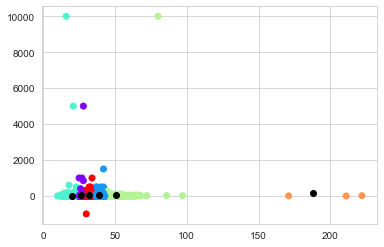

In [41]:
from matplotlib import pyplot as plt

plt.scatter(dataset_new['1. Qual a sua idade ?'].values,
            dataset_new['23. Até quanto você pagaria (mensalmente em R$) para consumir conteúdos exclusivos do seu podcast favorito?'].values,
            c=clusters.labels_, 
            cmap='rainbow')

plt.scatter(clusters.cluster_centers_[:, 0],
            clusters.cluster_centers_[:],
            color='black') 

plt.show()

## Analisando o valor de K utilizando o método do cotovelo na inercia

Como podemos visualizar, o melhor valor para K é 2, tendo em vista que através do metodo elbow podemos ver que nele o aumento no número de clusters não significa uma grande diminuição no diâmetro.

1 1106704.38999038
2 461903.5618565291
3 283475.58825597557
4 198888.52676306412
5 128492.27016969293
6 87258.04206290937
7 65191.014845943675
8 50592.2848563161
9 40542.08903540804
10 33435.12028850889


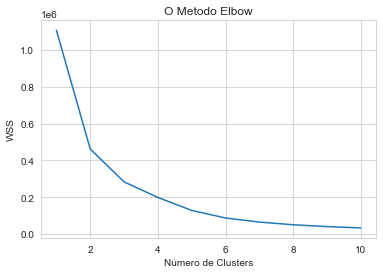

In [42]:
from sklearn.cluster import KMeans
wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Número de Clusters')
plt.ylabel('WSS')
plt.show()

## Implementação do modelo hierárquico

In [43]:
from sklearn.cluster import AgglomerativeClustering 

model = AgglomerativeClustering(distance_threshold=0, 
                                n_clusters=None,
                                linkage='single')

ac = model.fit(X)
clusters = ac.children_

In [44]:
ac

AgglomerativeClustering(distance_threshold=0, linkage='single', n_clusters=None)

In [46]:
print(clusters)

[[    0    24]
 [16644    56]
 [16645   104]
 ...
 [ 4072 12694]
 [33284 33283]
 [33282 33285]]


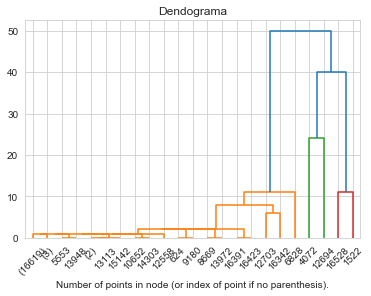

In [47]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


plt.title('Dendograma')
plot_dendrogram(model, truncate_mode='level', p=10)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

## Implementação de técnica diferenciada: DBSCAN

### calculando a distância de cada ponto até seu vizinho mais próximo usando o NearestNeighbors

In [156]:
neighbors = NearestNeighbors(n_neighbors=2)
nbrs = neighbors.fit(X)

distances, indices = nbrs.kneighbors(X)

In [157]:
indices

array([[ 7158, 11003],
       [ 3964,  6476],
       [ 4398,   720],
       ...,
       [ 4549,  7322],
       [ 1785, 15579],
       [ 6355,  7884]], dtype=int64)

### O ponto de épsilon ideal é 0.6

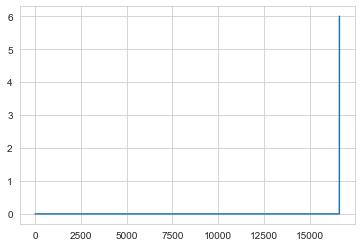

In [158]:
distances = np.sort(distances, axis=0)
distances = distances[:, 1][5:-5]
plt.plot(distances)

## Treinando o DBSCAN baseado no valor de épsilon

In [173]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.cluster import homogeneity_score

dbscan = DBSCAN(eps=0.6, min_samples=5).fit(X)
dbscan

DBSCAN(eps=0.6)

## Mostrando os labels

In [174]:
labels = dbscan.labels_
print(labels)

[ 0  1  2 ... 15 16  3]


## Estimando os números de clustering e ruidos

In [175]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [176]:
from sklearn.metrics.cluster import homogeneity_score

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 51
Estimated number of noise points: 27


## Plotando os labels

In [163]:
colors = ['red', 'blue', 'black']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

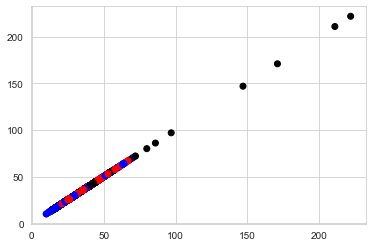

In [164]:
plt.scatter(X[0:], X[:,0], c=vectorizer(labels))